In [2]:
from non_markovian import get_spectral_density, compute_correlation_function
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
eta = 1.0
omega_c = 10.0
omegas = jnp.linspace(0, 30, 500)

# 1. Ohmic (s=1)
def ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=1.0)

# 2. Sub-Ohmic (s=0.5)
def sub_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=0.5)

# 3. Super-Ohmic (s=3.0) 
def super_ohmic_spectral_density(omega):
    return get_spectral_density(omega, eta, omega_c, s=3.0)

W0131 13:17:57.119172   10774 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0131 13:17:57.121922   10561 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


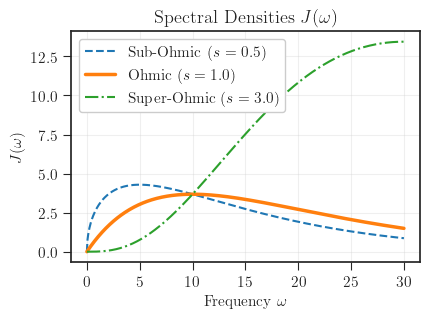

In [ ]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])

fig, ax = plt.subplots(figsize=(4.5, 3))

plt.plot(omegas, ohmic_spectral_density, label=r'Sub-Ohmic ($s=0.5$)', linestyle='--')
plt.plot(omegas, J_ohmic, label=r'Ohmic ($s=1.0$)', linewidth=2.5)
plt.plot(omegas, J_super, label=r'Super-Ohmic ($s=3.0$)', linestyle='-.')

plt.title(r"Spectral Densities $J(\omega)$")
plt.xlabel(r'Frequency $\omega$')
plt.ylabel(r'$J(\omega)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
times = jnp.linspace(0, 2.0, 300)
beta = 1.0
w_max = 100.0   # Integration limit (should be >> OMEGA_C)
n_steps = 5000  # Precision of integration

C_t = compute_correlation_function(times, J_ohmic, beta, w_max, n_steps)

TypeError: 'jaxlib._jax.ArrayImpl' object is not callable